In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

In [2]:
s = Service("C:/Users/amrut/Downloads/chromedriver-win64/chromedriver-win64/chromedriver.exe")

In [7]:
driver = webdriver.Chrome(service=s)
driver.get('https://www.ajio.com/')

In [8]:
driver.find_element(by=By.XPATH,value='//*[@id="appContainer"]/div[1]/div/header/div[3]/div[1]/ul/li[2]/a/span').click()

In [9]:
search_input = driver.find_element(by=By.XPATH,value='//*[@id="appContainer"]/div[1]/div/header/div[3]/div[2]/form/div/div/input')

In [10]:
search_input.send_keys("Bags")

In [11]:
search_input.send_keys(Keys.ENTER)

In [12]:
height = driver.execute_script('return document.body.scrollHeight')
height

26728

In [13]:
while True:
    driver.execute_script('window.scrollTo(0,document.body.scrollHeight)')
    new_height = driver.execute_script('return document.body.scrollHeight')
    
    if new_height==height:
        break
    height=new_height

In [14]:
html = driver.page_source

'<html lang="en"><head>\n      <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <meta name="format-detection" content="telephone=no">\n      <meta charset="utf-8">\n      <meta name="google-site-verification" content="mst3EDdpHbIKH409fDtfXk-wS6DAbcyLv-BXDg55gfo">\n      <meta http-equiv="Cache-control" content="no-transform">\n      <meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=yes">\n      <meta name="author" content="">\n        \n        <meta name="og:type" content="website">\n        <meta name="og:site_name" content="Ajio.com">\n        <meta name="fb:app_id" content="233163173739076">\n        <meta name="twitter:card" content="summary">\n        <meta name="twitter:site" content="@AJIOLife">\n        \n        \n          <meta name="description" content="Buy online at Bags. Huge footwear and Clothing range. Order now and avail Best Discounts, Ca
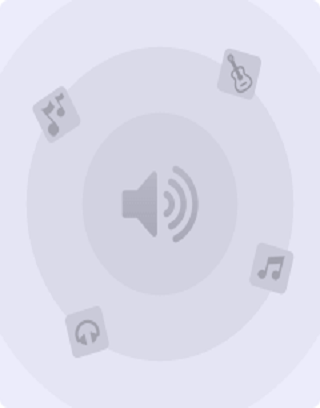

In [15]:
html

In [16]:
with open('ajio_bags.html','w',encoding='utf-8') as file:
    file.write(html)

In [17]:
soup = BeautifulSoup(html,'lxml')

In [22]:
container = soup.find_all('div',{'class':'preview'})

In [48]:
import numpy as np
brand=[]
style_type=[]
price=[]
offer_price=[]
for i in container:
    brand.append(i.find('strong').text)
    style_type.append(i.find('div',{'class':'nameCls'}).text)
    price.append(i.find('span',{'class':'price'}).text)
    try:
        offer_price.append(i.find('span',{'class':'offer-pricess'}).text)
    except:
        offer_price.append(np.nan)

In [49]:
len(offer_price)

495

In [50]:
import pandas as pd
df = pd.DataFrame({'brand':brand,'style':style_type,'price':price,'offer_price':offer_price})
df

,brand,style,price,offer_price
0,ARMANI EXCHANGE,Wave Classic Hobo Bag,"₹11,999","₹10,199"
1,Miraggio,Solid Tote Bag,"₹3,374","₹3,074"
2,Puma,X Anushka Tote Bag with Detachable Strap,"₹1,600","₹1,240"
3,Dune London,E'Bug Evening Bag,"₹5,600","₹4,480"
4,Mini Wesst,Women Quilted Tote Bag,"₹1,700",NaN
...,...,...,...,...
490,U.S. Polo Assn.,Women Signature Baguette Bag,"₹1,709","₹1,213"
491,ALTHEORY,Men Toilet Pouch,₹450,NaN
492,Womanix,Women Laptop Tote Bag & Pouch with Detachable ...,"₹2,183","₹1,883"
493,HIDESIGN,Textured Genuine Leather Slingbag with Metalli...,"₹4,137","₹3,837"


In [51]:
df.isnull().sum()

brand            0
style            0
price            0
offer_price    159
dtype: int64